<a href="https://colab.research.google.com/github/SeanEwanDalton/Data-Analytics_Stock_Exchange_Python/blob/main/Stock_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Analysing stock exchange data from 2010-2020 for "N225"**

1. Importing data set and tools

In [7]:
from google.colab import auth
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

auth.authenticate_user()
query = 'SELECT * FROM `expanded-poet-384708.stock_exchange_data_kaggle.stock_exchange_data` WHERE Index = "N225" ORDER BY Date'


2. Checking the table successfully imported

In [8]:
df_stock = pd.read_gbq(query, project_id="expanded-poet-384708")
print(df_stock) 

      Index        Date         Open         High          Low        Close  \
0      N225  1965-01-05  1257.719971  1257.719971  1257.719971  1257.719971   
1      N225  1965-01-06   1263.98999   1263.98999   1263.98999   1263.98999   
2      N225  1965-01-07   1274.27002   1274.27002   1274.27002   1274.27002   
3      N225  1965-01-08  1286.430054  1286.430054  1286.430054  1286.430054   
4      N225  1965-01-11         null         null         null         null   
...     ...         ...          ...          ...          ...          ...   
14495  N225  2021-05-28  28912.53906  29194.10938  28899.66016  29149.41016   
14496  N225  2021-05-31  29019.44922  29147.71094  28791.59961  28860.08008   
14497  N225  2021-06-01  28998.65039   29075.4707     28611.25  28814.33984   
14498  N225  2021-06-02  28730.81055  29003.55078  28565.83008  28946.14063   
14499  N225  2021-06-03  28890.39063  29157.16016  28879.15039  29058.10938   

         Adj_Close    Volume  
0      1257.719971  

3. Set column "Date" as index

In [9]:
df_stock["Date"] = pd.to_datetime(df_stock["Date"])
df_stock = df_stock.set_index("Date")

4. Test the visualisation is working and changing to scatter plot
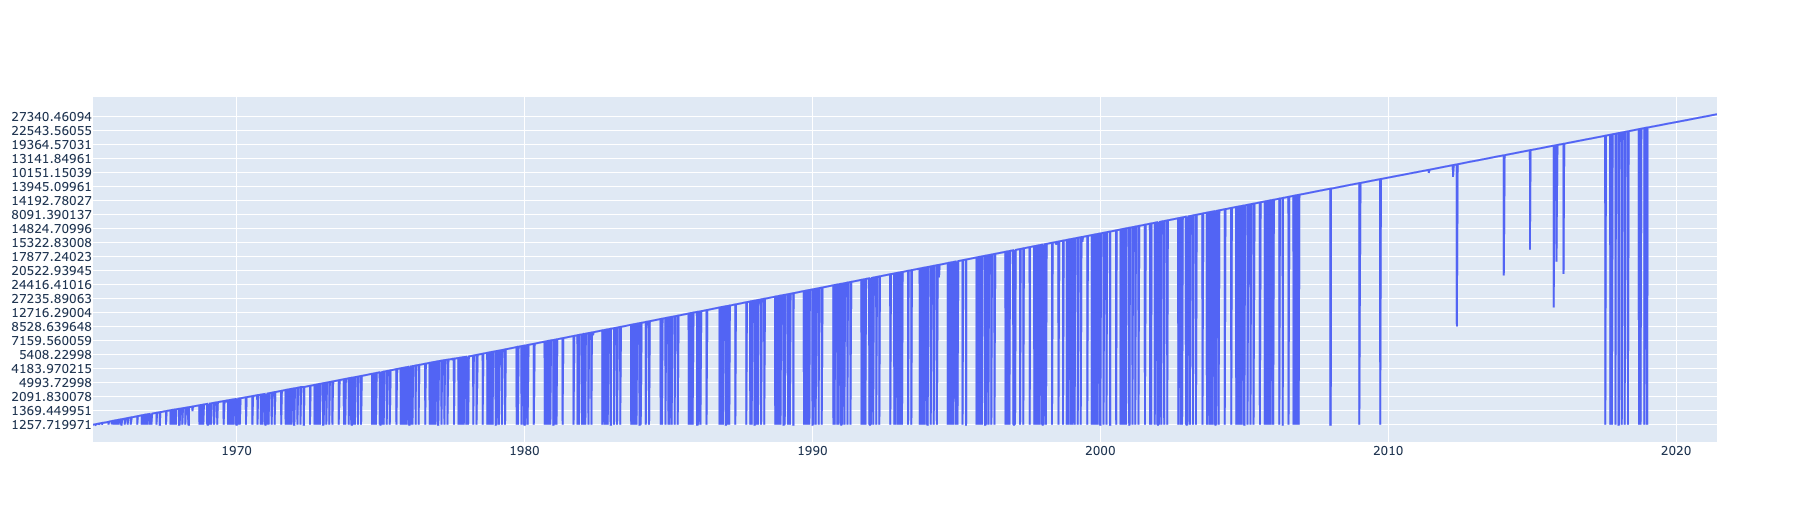

In [10]:
fig = go.Figure(data=go.Scatter(x=df_stock.index, y=df_stock["Open"], mode="lines", name="Stock Price"))
fig.show()


5. Selecting years between 2010-2020 and updating axis titles
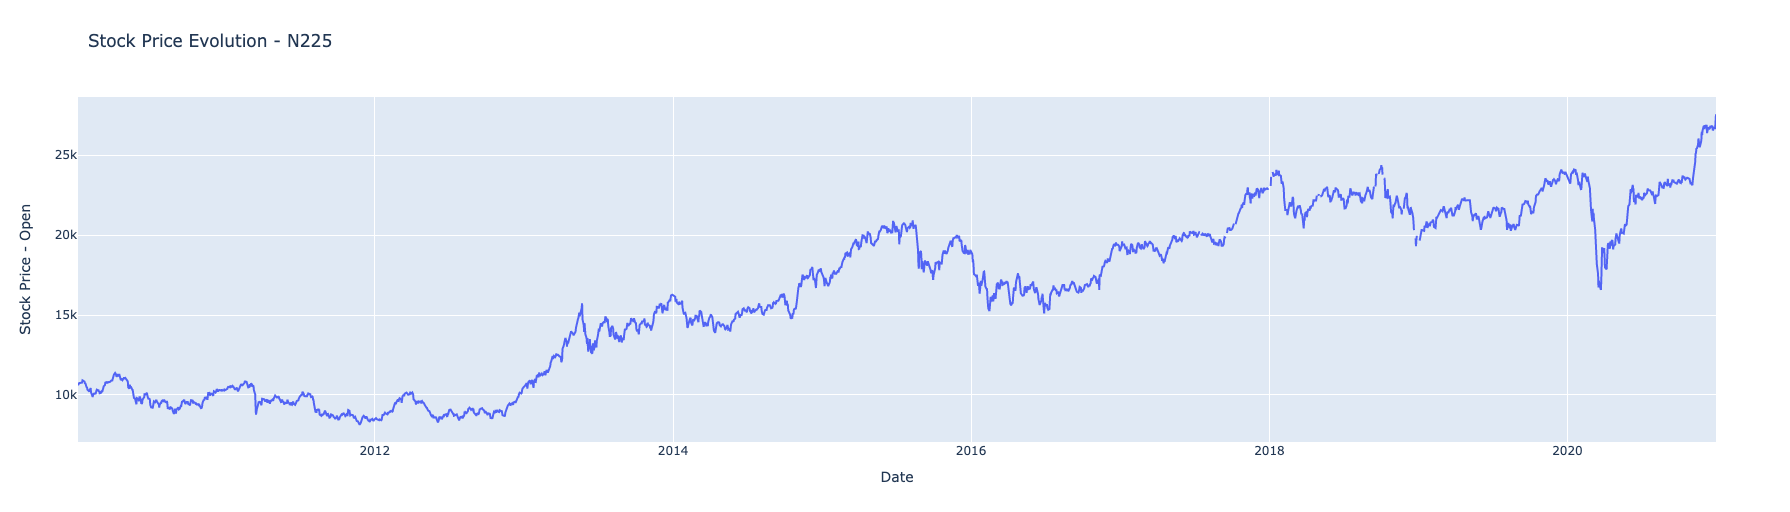

In [11]:
filtered_data = df_stock[(df_stock.index.year >= 2010) & (df_stock.index.year <= 2020)]
filtered_data = filtered_data.copy()
filtered_data["Open"] = pd.to_numeric(filtered_data["Open"], errors="coerce")

fig = go.Figure(data=go.Scatter(x=filtered_data.index, y=filtered_data["Open"], mode="lines", name="Stock Price"))
fig.update_layout(title="Stock Price Evolution - N225", xaxis_title="Date", yaxis_title="Stock Price - Open")
fig.show()